SIN-392 - Introduction to Digital Image Processing (2023-1)

# Lecture 09 - Image segmentation - Thresholding

Prof. João Fernando Mari ([*joaofmari.github.io*](https://joaofmari.github.io/))

---

## Importing the libraries

In [1]:
import numpy as np

from scipy import ndimage as ndi
from scipy import misc
from skimage import util, filters, data, morphology, measure, color
from skimage import img_as_float

import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.patches as mpatches

### %matplotlib notebook
SMALL_SIZE = 8
matplotlib.rc('font', size=SMALL_SIZE)

## Loading an image

In [2]:
# Loading an image (from skimage)
img = data.coins()

# Converts to float. Values in [0, 1]
img = util.img_as_float(img.astype(np.uint8))

## Effect of varying the threshold value

In [3]:
# List of threshold values
limiares = [0.1, 0.2, 0.5, 0.7, 0.9]

# List to receive processed images
img_list = []

# Insert the original image at the beginning of the list
img_list.append(img)

# Processes the original image with the values in the 'limiares' list
for limiar in limiares:
    # Perform the thresholding
    # - Values greater than the threshold --> True
    # - Values less than or equal to the threshold --> False
    im_temp = img > limiar
    
    # Insert the processed image into the 'img_list' list
    img_list.append(im_temp)

### Plotting the images

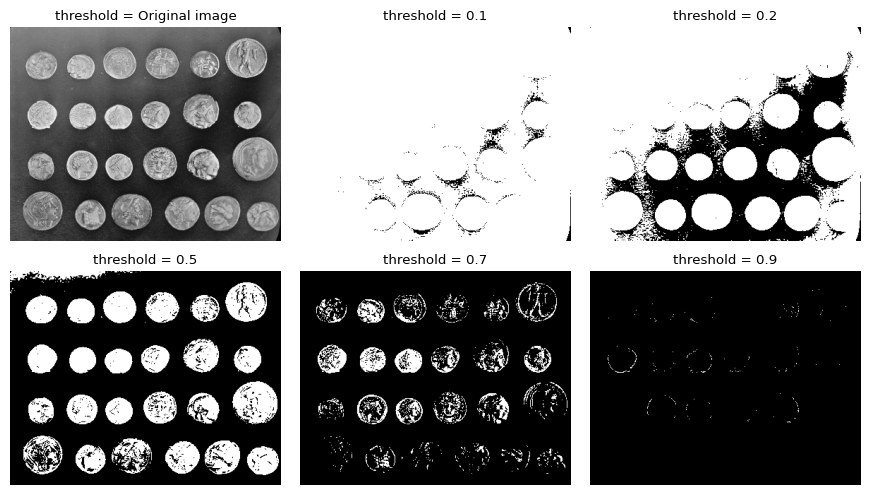

In [4]:
# List of titles
title_list = ['Original image'] + [str(value) for value in limiares]
title_list

# Create a figure
plt.figure(figsize=(9, 5))

for i, img_ in enumerate(img_list):
    plt.subplot(2,3,i+1)
    plt.imshow(img_, cmap='gray')
    plt.axis('off')
    plt.title(f'threshold = {title_list[i]}')
    plt.tight_layout()
    
# Shows the figures on the screen
plt.show()

## Basic global thresholding

* Implementation of a simple iterative method to find a threshold value to segment an image.

In [5]:
def limiar_global_simples(im, T_ini=None, min_delta_T=None, plot=False):
    """
    A basic (simple) thresholding iterative algorithm.
    
    Parameters:
    -----------
    T_ini: float
        Default: None.
    
    min_delta_T: float
        Default: None.
    
    plot: bool
        Default: False.
    """
    if T_ini==None:
        # # No initial value assigned. Consider the mean intensity.
        T_ini = im.mean()
        
    if min_delta_T==None:
        # If min_delta T is not specified: 
        # - 'min_delta T' is 1% of the highest intensity!
        min_delta_T = im.max() * 0.01

    # # Initialize T with T_ini.
    T = T_ini
    # Initializes delta_T with Infinity.
    delta_T = np.inf

    # Iterate while delta_t >= min_delta_T
    i = 0
    while delta_T >= min_delta_T:
        # Segment the image using T.
        g_bw = im > T

        # Compute the number of objects pixels and background pixels.
        num_px_bg, num_px_fg = np.bincount(g_bw.flatten()) 

        # Builds the image with the object pixels.
        g_fg = im * g_bw
        # Builds the image with the background pixels.
        g_bg = im * np.invert(g_bw)

        # Mean intensity: object pixels
        fg_mean = g_fg.sum() / float( num_px_fg )
        # Mean intensity: background pixels
        bg_mean = g_bg.sum() / float( num_px_bg )

        # Store the current value of T.
        T_old = T
        
        # Compute a new threshold T.
        T = 0.5 * (fg_mean + bg_mean)
        
        # Compute the new delta_T value.
        delta_T = np.abs(T - T_old)

        # Print information
        print('\nIteration: ', i)
        print(' - Previous T: ', T_old)
        print(' - Current T:    ', T)
        print(' - delta_T     ', delta_T)

        # Plots the partial images
        if plot == True:
            plt.figure(figsize=(9, 3))
            plt.suptitle(str('Iteration ' + str(i)) , y=1.05)

            plt.subplot(131); 
            plt.imshow(im, cmap='gray')
            plt.axis('off')
            plt.title('Original image')

            plt.subplot(132); 
            plt.imshow(g_bw, cmap='gray')
            plt.axis('off')
            plt.title('Segmented image.')

            plt.subplot(133); 
            # Plot histogram
            weights = np.ones(im.ravel().shape)/float(im.size)
            plt.hist(im.ravel(), bins=256, weights=weights, range=(0,1))
            plt.axvline(T, color='r')

            plt.tight_layout()
            # plt.show()

        # Incrementa i
        i = i + 1

    # Returns the threshold T.
    return T


Iteration:  0
 - Previous T:  0.1
 - Current T:     0.23526893853148698
 - delta_T      0.13526893853148697

Iteration:  1
 - Previous T:  0.23526893853148698
 - Current T:     0.32323202644545423
 - delta_T      0.08796308791396726

Iteration:  2
 - Previous T:  0.32323202644545423
 - Current T:     0.3716258334458229
 - delta_T      0.04839380700036866

Iteration:  3
 - Previous T:  0.3716258334458229
 - Current T:     0.3979501045502393
 - delta_T      0.02632427110441643

Iteration:  4
 - Previous T:  0.3979501045502393
 - Current T:     0.4106239381482553
 - delta_T      0.012673833598015993

Iteration:  5
 - Previous T:  0.4106239381482553
 - Current T:     0.4161211953105037
 - delta_T      0.005497257162248359

Final T:  0.4161211953105037


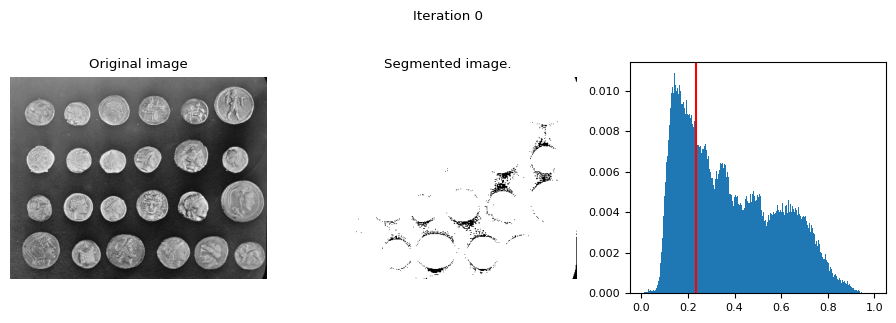

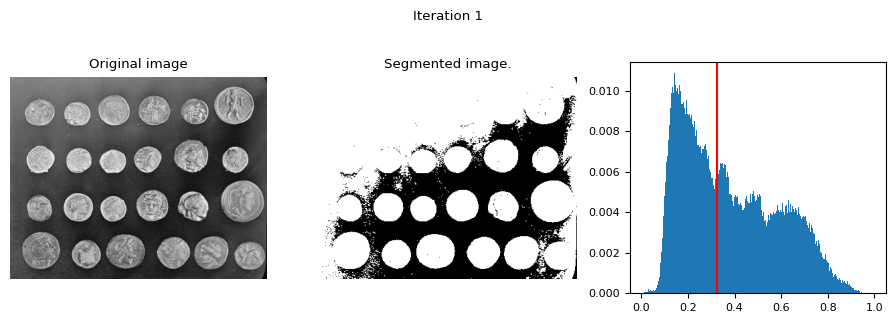

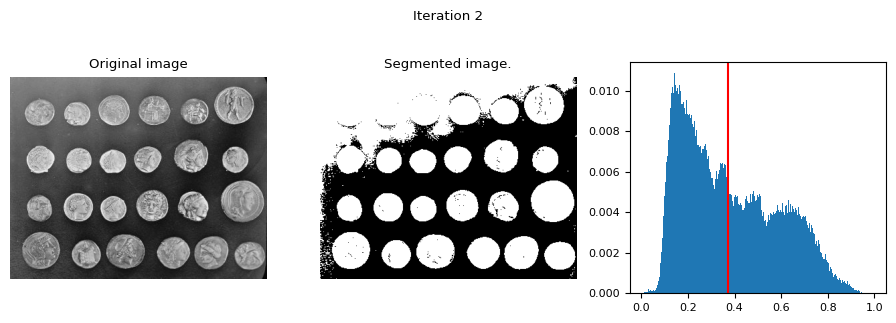

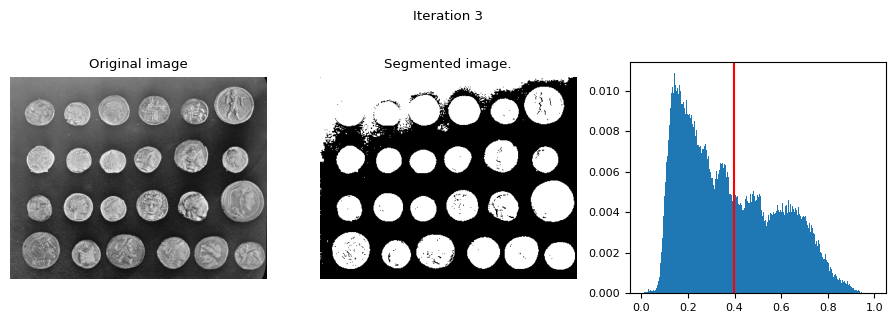

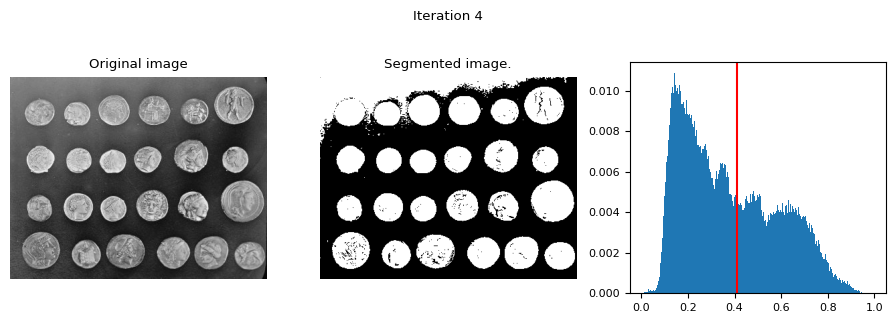

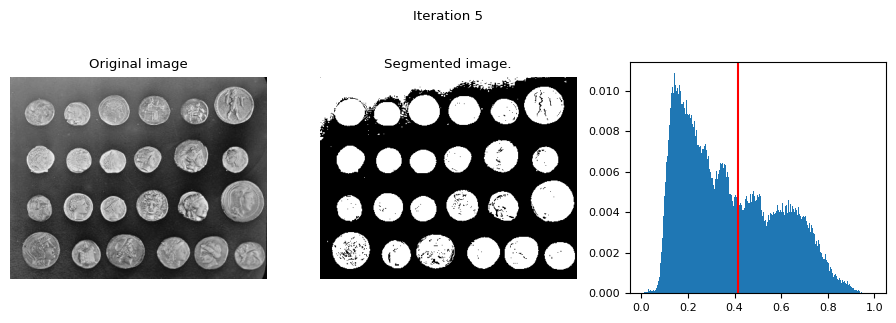

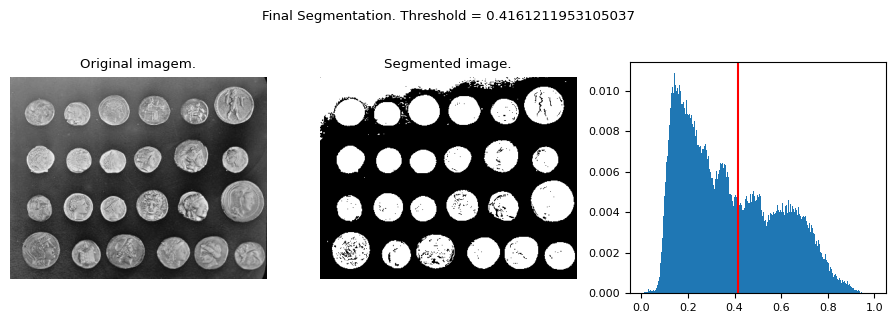

In [6]:
if __name__ == '__main__':
    """
    """
    # Load an image
    # ------------------
    ## im = misc.ascent()
    ## im = data.camera()
    im = data.coins()

    im = img_as_float(im.astype(np.uint8))

    # Calls the function to calculate the iterative global threshold
    # --------------------------------------------------------------
    valor_T = limiar_global_simples(im=im, T_ini=0.1, plot=True)
    # TEST
    print('\nFinal T: ', valor_T)

    # Segments the image with the T threshold.
    im_bw = im > valor_T

    # Plot the final image
    # --------------------
    plt.figure(figsize=(9, 3))
    plt.suptitle('Final Segmentation. Threshold = ' + str(valor_T), y=1.05)
    plt.subplot(131)
    plt.imshow(im, cmap='gray')
    plt.title('Original imagem.')
    plt.axis('off')
    plt.subplot(132)
    plt.imshow(im_bw, cmap='gray')
    plt.title('Segmented image.')
    plt.axis('off')
    plt.subplot(133); 
    # Plot the histogram
    weights = np.ones(im.ravel().shape)/float(im.size)
    plt.hist(im.ravel(), bins=256, weights=weights, range=(0,1))
    plt.axvline(valor_T, color='r')

    # Plot the figures
    # ----------------
    plt.tight_layout()
    plt.show()

## Otsu's method

* Otsu's method calculates the optimal threshold to segment an image by maximizing the variance between classes.

In [7]:
th_otsu = filters.threshold_otsu(img)

print(th_otsu)

# # Applying the threshold
img_otsu = img > th_otsu

0.4172564338235294


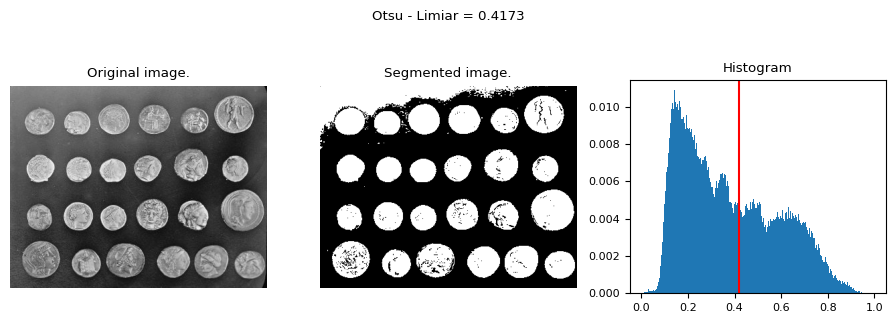

In [8]:
plt.figure(figsize=(9, 3))
plt.suptitle('Otsu - Limiar = ' + ('%.4f' % (th_otsu)), y=1.05)
plt.subplot(131)
plt.imshow(im, cmap='gray')
plt.title('Original image.')
plt.axis('off')
plt.subplot(132)
plt.imshow(img_otsu, cmap='gray')
plt.title('Segmented image.')
plt.axis('off')
plt.subplot(133); 
# Plot the histogram
weights = np.ones(im.ravel().shape)/float(im.size)
plt.hist(im.ravel(), bins=256, weights=weights, range=(0,1))
plt.axvline(th_otsu, color='r')
plt.title('Histogram')

# Plot the figures
# ----------------
plt.tight_layout()
plt.show()

## Effect of smoothing on thresholding

In [9]:
# Imposes Gaussian noise on the image
img_noise = util.random_noise(img)

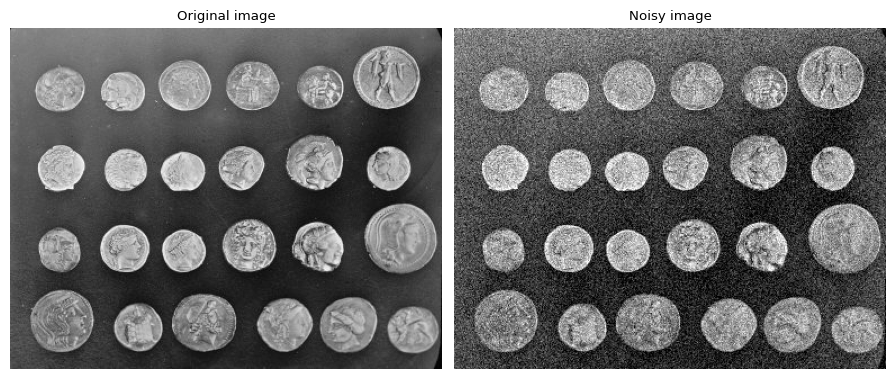

In [10]:
plt.figure(figsize=(9, 4))

plt.subplot(1,2,1)
plt.imshow(img, cmap='gray')
plt.axis('off')
plt.title('Original image')

plt.subplot(1,2,2)
plt.imshow(img_noise, cmap='gray')
plt.title('Noisy image')

plt.axis('off')
plt.tight_layout()
plt.show()

In [11]:
medias = [3, 5, 7, 9]

# List of images filtered by mean.
imagens_med = []
# List of images segmented by the Otsu method.
imagens_seg = []
# List with the threshold values.
limiares = []

for media in medias:
    # Perform the mean filtering
    im_med = ndi.convolve(img_noise, np.ones([media, media])/(media * media))
    imagens_med.append(im_med)
    
    # Compute the threshold for each image after filtering.
    limiar = filters.threshold_otsu(im_med)
    limiares.append(limiar)
    
    # Perform the thresholding.
    im_temp = im_med > limiar
    imagens_seg.append(im_temp)
    
# Print the thresholds
print(limiares)

[0.4100459975152284, 0.4085651601984684, 0.40262219978231106, 0.4027268974286098]


### Plotting the images

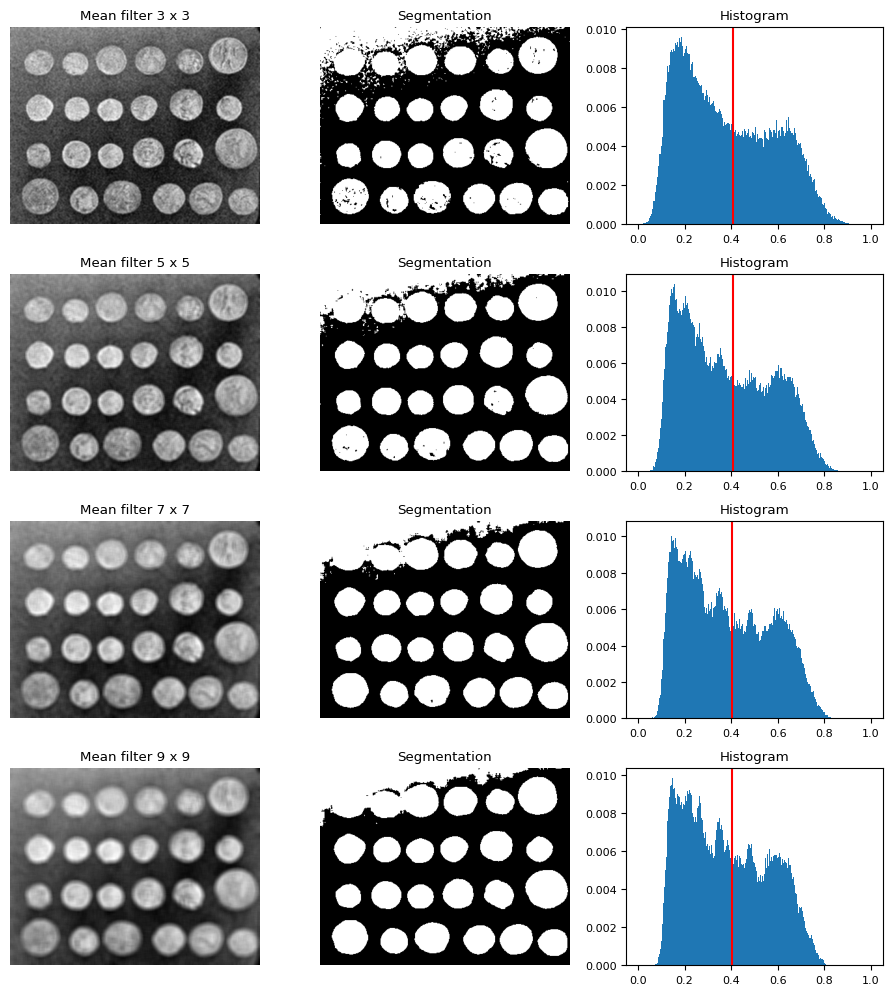

In [12]:
fig, ax = plt.subplots(4, 3, figsize=(9, 10))
for i in range(len(imagens_seg)):
    # Plot image
    im_ = ax[i, 0].imshow(imagens_med[i], cmap='gray')
    ax[i, 0].axis('off')
    ax[i, 0].set_title(str('Mean filter ' + str(medias[i]) + ' x ' + str(medias[i])))
    
    # Plot image
    im_ = ax[i, 1].imshow(imagens_seg[i], cmap='gray')
    ax[i, 1].axis('off')
    ax[i, 1].set_title(str('Segmentation'))

    # Plot the histogram
    weights = np.ones(imagens_med[i].ravel().shape)/float(im.size)
    ax[i, 2].hist(imagens_med[i].ravel(), bins=256, weights=weights, range=(0,1))
    ax[i, 2].axvline(limiares[i], color='r')
    ax[i, 2].set_title(str('Histogram'))
    
plt.tight_layout()
plt.show()

## Local threshold
---

* Consists of dividing an image into sub-images using slicing.
* Each sub-image is segmented individually using the Otsu method.
* The segmented sub-images are then combined into a single image.

In [13]:
# Note: This is a simplified implementation for teaching purposes.
# --------
# If the division of the rows or columns is not exact, i.e., some rows or columns remain, 
#     these rows and columns are ignored.
#
# Example: Image with 512 x 512 divided into 3 rows and 3 columns
# --------
# Height of sub-images: 512 // 3 = 170 pixels. 2 pixels left (170 * 3 = 500)

# **** Enter the number of sub-images ****
# Same value in x and y.
num_tiles = 3

# Number of rows and columns in the image
num_l, num_c = im.shape
# print(num_l, num_c)

# Size of the sub-images
size_tile_l = int(num_l // num_tiles)
size_tile_c = int(num_c // num_tiles)
# print(size_tile_l, size_tile_c)

# Size of the last sub-images
size_last_l = int(num_l % num_tiles)
size_last_c = int(num_c % num_tiles)
# print(size_last_l, size_last_c)

# # Crop the sub-images and store them in an image list
# =====================================================
lin = np.arange(0, num_l, num_l/num_tiles).astype(int)
col = np.arange(0, num_c, num_c/num_tiles).astype(int)
# print(lin)
# print(col)

# List with the sub-images
tiles = []

# List with the indexes of the first row and first column of each sub-image (tile)
tiles_lc = []

i = 0
for l in lin:
    for c in col:
        # Crop the sub-image
        im_tile = im[l:l+size_tile_l, c:c+size_tile_c]
        
        # Add the sub-image to the list
        tiles.append(im_tile)
        
        tiles_lc.append((l, c))
        
        i = i + 1
        
# Segment each sub-image individually using the Otsu method
# ================================================================

# List with the thresholds for each sub-image
limiares = []
# List with the segmented sub-images
tiles_seg = []

for tile in tiles:
    limiar = filters.threshold_otsu(tile)
    limiares.append(limiar)
    
    tile_seg = tile > limiar
    tiles_seg.append(tile_seg)
    
# Combines the segmented images into a new single image
# =====================================================
i = 0 # Counter for sub-images

# Output image
im_seg = np.zeros(im.shape)

for l in lin:
    for c in col:
        im_seg[l:l+tiles_seg[i].shape[0], c:c+tiles_seg[i].shape[1]] = tiles_seg[i]
        i = i + 1

### Plotando as imagens

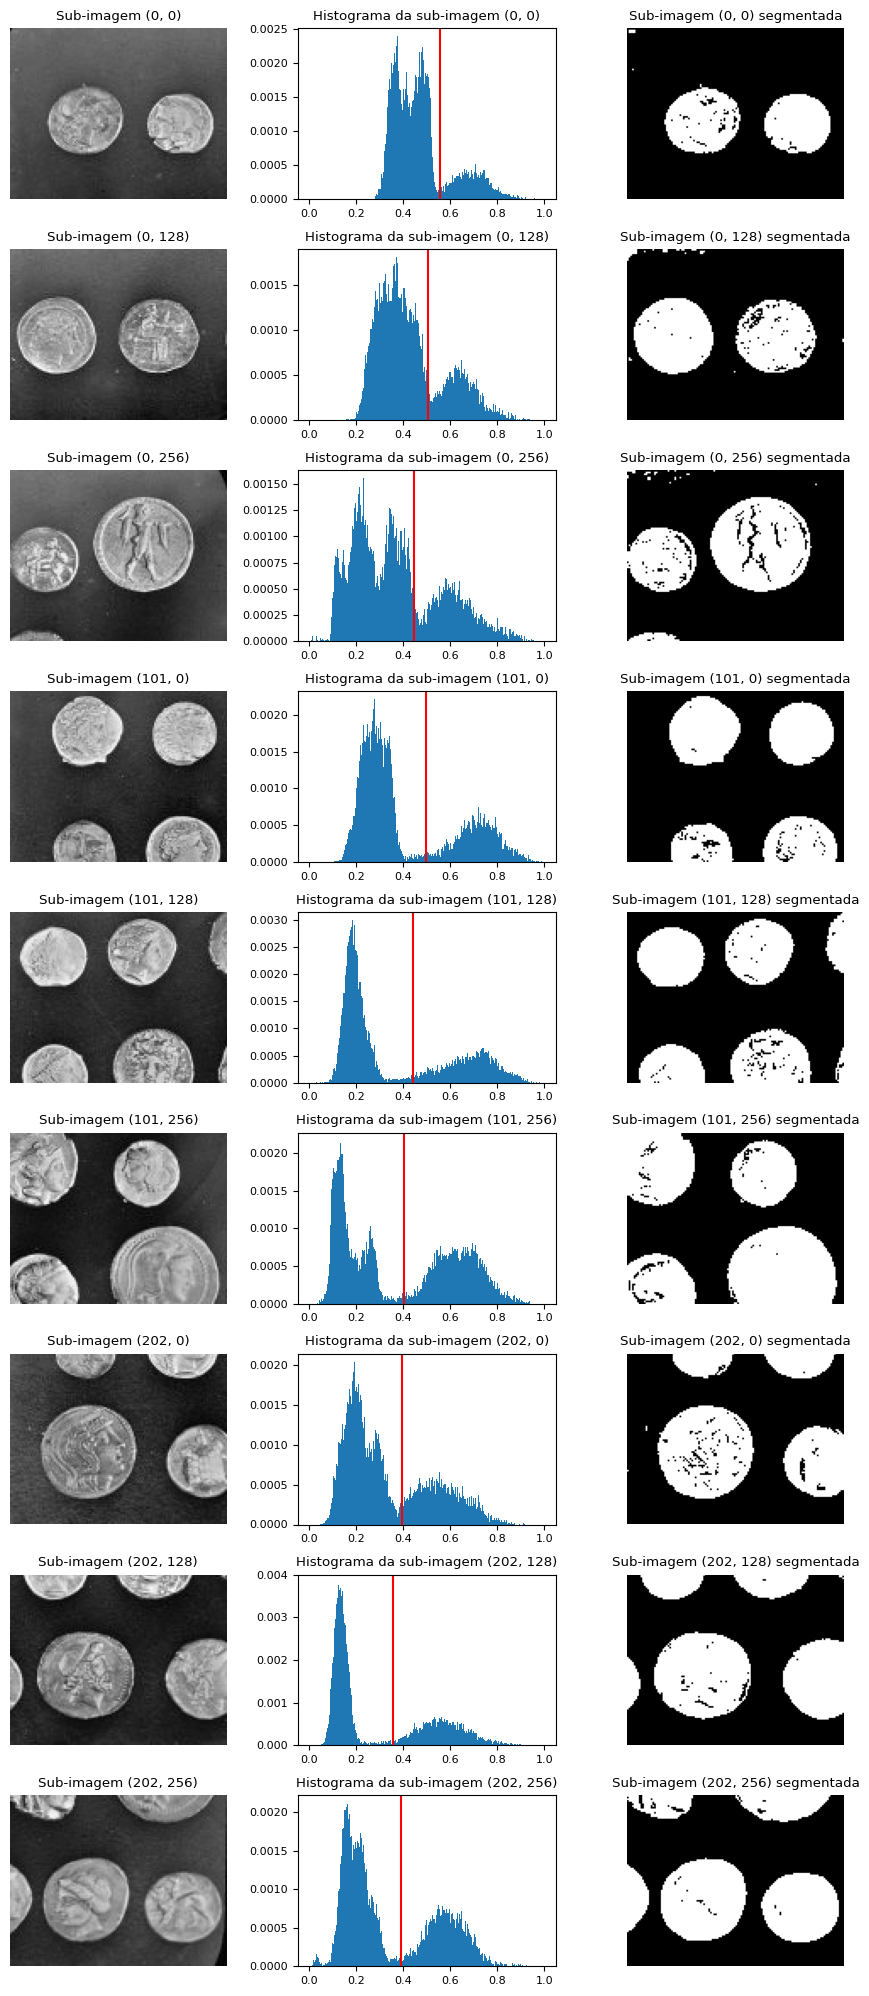

In [14]:
total_tiles = num_tiles * num_tiles

fig, ax = plt.subplots((total_tiles), 3, figsize=(9, 20))
for i in range(len(tiles)):
    # Plot the sub-image
    im_ = ax[i, 0].imshow(tiles[i], cmap='gray')
    ax[i, 0].set_title(f'Sub-imagem {tiles_lc[i]}')
    ax[i, 0].axis('off')
    # ax[i, 0].set_title(str('Filtro da média ' + str(medias[i]) + ' x ' + str(medias[i])))
    
    # Plot the histogram
    weights = np.ones(tiles[i].ravel().shape)/float(im.size)
    ax[i, 1].hist(tiles[i].ravel(), bins=256, weights=weights, range=(0,1))
    ax[i, 1].set_title(f'Histograma da sub-imagem {tiles_lc[i]}')
    
    ax[i, 1].axvline(limiares[i], color='r')   
    
    # Plots the segmented sub-image
    im_ = ax[i, 2].imshow(tiles_seg[i], cmap='gray')
    ax[i, 2].set_title(f'Sub-imagem {tiles_lc[i]} segmentada')
    ax[i, 2].axis('off')
    
plt.tight_layout()
plt.show()

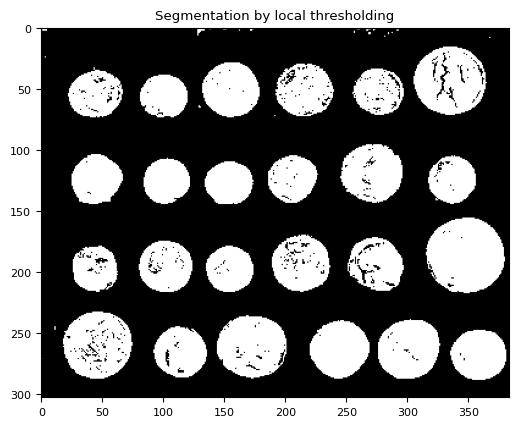

In [15]:
plt.figure()
plt.imshow(im_seg, cmap='gray')
plt.title('Segmentation by local thresholding')
plt.show()

### Comparison: Otsu Vs. Local Thresholding

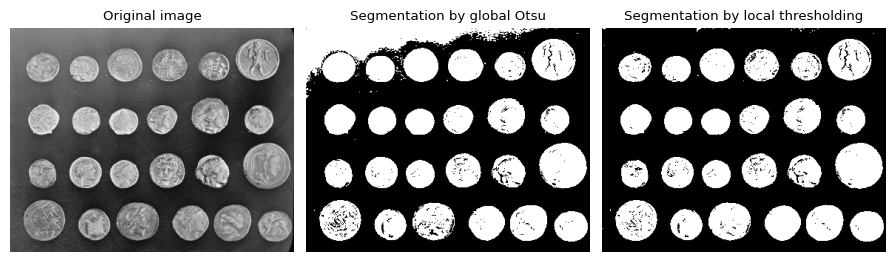

In [16]:
fig, (ax1, ax2,ax3) = plt.subplots(1, 3, figsize=(9, 4))

ax1.imshow(im, cmap='gray')
ax1.axis('off')
ax1.set_title('Original image')

ax2.imshow(img_otsu, cmap='gray')
ax2.axis('off')
ax2.set_title('Segmentation by global Otsu')

ax3.imshow(im_seg, cmap='gray')
ax3.axis('off')
ax3.set_title('Segmentation by local thresholding')

plt.axis('off')
plt.tight_layout()
plt.show()

## Labels

In [17]:
# Observation:
# -----------
# This is a mathematical morphology operation. The theme of the next part of the course.
# Used to smooth the shape of objects in the image.
im_seg_cl = morphology.closing(im_seg, np.ones([3,3], dtype=float))

# Generates the label image
im_rotulos = measure.label(im_seg_cl)

# Generates a colored representation of the label image.
# - For each label is assigned a color.
im_rotulos_sobre = color.label2rgb(im_rotulos, image=im, bg_label=0)

### Plotting the images

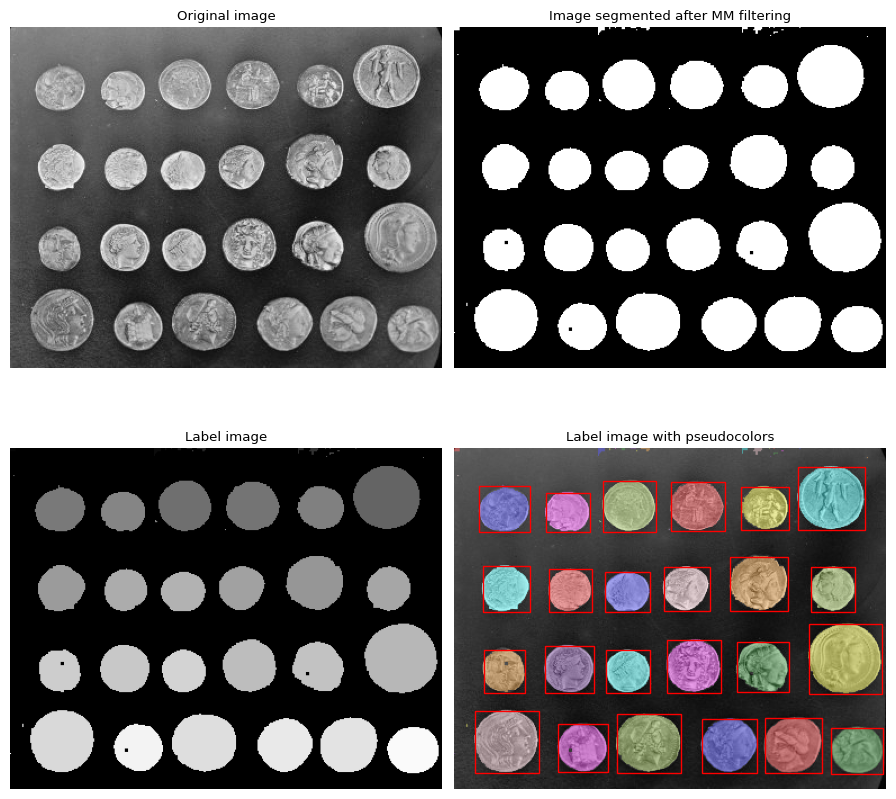

In [18]:
fig, ((ax1, ax2),(ax3, ax4)) = plt.subplots(2, 2, figsize=(9, 9))

ax1.imshow(im, cmap='gray')
ax1.axis('off')
ax1.set_title('Original image')
ax2.imshow(im_seg_cl, cmap='gray')
ax2.axis('off')
ax2.set_title('Image segmented after MM filtering')
ax3.imshow(im_rotulos, cmap='gray')
ax3.axis('off')
ax3.set_title('Label image')

ax4.imshow(im_rotulos_sobre)
for region in measure.regionprops(im_rotulos):
    # Only regions larger than the threshold
    if region.area >= 100:
        # Draws the bounding-box of each object
        minr, minc, maxr, maxc = region.bbox
        rect = mpatches.Rectangle((minc, minr), maxc - minc, maxr - minr,
                                  fill=False, edgecolor='red', linewidth=1)
        ax4.add_patch(rect)

plt.axis('off')
ax4.set_title('Label image with pseudocolors')

plt.tight_layout()
plt.show()

## Bibliography
---

* GONZALEZ, R.C.; WOODS, R.E.; Digital Image Processing. 3rd edition. Pearson, 2009.
* MARQUES FILHO, O.; VIEIRA NETO, H. Processamento digital de imagens. Brasport, 1999.
    * In Brazilian Portuguese.
    * Available for download on the author's website (Personal use only).
    * http://dainf.ct.utfpr.edu.br/~hvieir/pub.html  
* J. E. R. Queiroz, H. M. Gomes. Introdução ao Processamento Digital de Imagens. RITA. v. 13, 2006.
    * In Brazilian Portuguese.
    * http://www.dsc.ufcg.edu.br/~hmg/disciplinas/graduacao/vc-2016.2/Rita-Tutorial-PDI.pdf  
* Universidade de Waterloo. Image Repository.
    * http://links.uwaterloo.ca/Repository.html
* The USC-SIPI Image Database    
    * http://sipi.usc.edu/database/database.php
* Gaël Varoquaux Emmanuelle Gouillart; Olav Vahtras; Pierre de Buyl (editores). Scipy Lecture Notes. Release 2020.1
    * http://scipy-lectures.org/
* scikit-image. Documentation.
    * https://scikit-image.org/docs/dev/index.html
* scikit-image. Documentation. Module 'filters'.
    * https://scikit-image.org/docs/dev/api/skimage.filters.html
* scikit-image. Documentation. Module 'feature'.
    * https://scikit-image.org/docs/dev/api/skimage.feature.html
* scikit-image. Local Otsu Threshold
    * https://scikit-image.org/docs/0.12.x/auto_examples/segmentation/plot_local_otsu.html
* scikit-image. Thresholding.
    * https://scikit-image.org/docs/dev/auto_examples/segmentation/plot_thresholding.html
* scikit-image. Label image regions
    * https://scikit-image.org/docs/dev/auto_examples/segmentation/plot_label.html
* NumPy. Documentation.
    * https://numpy.org/doc/stable/
* NumPy. Convolution
    * https://docs.scipy.org/doc/scipy/reference/generated/scipy.ndimage.convolve.html